In [1]:
import warnings


In [2]:
warnings.filterwarnings('ignore')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.set_printoptions(precision=4, linewidth=100)

In [5]:
mba_salary_df = pd.read_csv('MBA Salary.csv')

In [6]:
mba_salary_df.head(2)

S. No.  Percentage in Grade 10  Salary
0       1                   62.00  270000
1       2                   76.33  200000

In [7]:
import statsmodels.api as sm

In [8]:
X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])

In [9]:
X.head(5)

const  Percentage in Grade 10
0    1.0                   62.00
1    1.0                   76.33
2    1.0                   72.00
3    1.0                   60.00
4    1.0                   61.00

In [10]:
Y = mba_salary_df['Salary']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_X , test_x , train_y , test_y = train_test_split( X, Y , train_size = 0.8 , random_state = 100)

In [13]:
#creating the model by passing the train_X and train_y to make the algo to understand
mba_salary_lm = sm.OLS(train_y , train_X).fit()

In [14]:
mba_salary_lm

In [15]:
type(mba_salary_lm)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [28]:
# regression paramters
print(mba_salary_lm.params)

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [51]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2020-06-15 07:34      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

In [29]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [30]:
mba_salary_resid = mba_salary_lm.resid
probplot = sm.ProbPlot(mba_salary_resid)

In [31]:
plt.figure( figsize = (8,6))

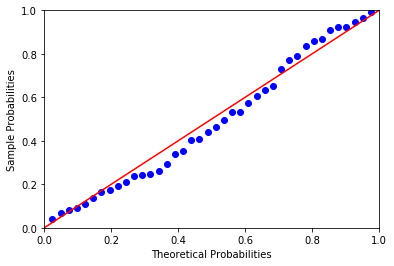

In [28]:
probplot.ppplot( line = '45')

In [33]:
def get_standardized_values(vals):
    return ( vals - vals.mean())/vals.std()

In [35]:
plt.scatter(get_standardized_values(mba_salary_lm.fittedvalues),get_standardized_values(mba_salary_resid))



In [36]:
from scipy.stats import zscore

In [37]:
mba_salary_df['z_score_salary'] = zscore(mba_salary_df.Salary)

In [38]:
mba_salary_df[( mba_salary_df.z_score_salary > 3.0 ) | (mba_salary_df.z_score_salary < -3.0)]

Empty DataFrame
Columns: [S. No., Percentage in Grade 10, Salary, z_score_salary]
Index: []

In [39]:
import numpy as np

In [40]:
mba_influence = mba_salary_lm.get_influence()

In [41]:
(c,p) = mba_influence.cooks_distance

C:\ProgramData\Anaconda36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

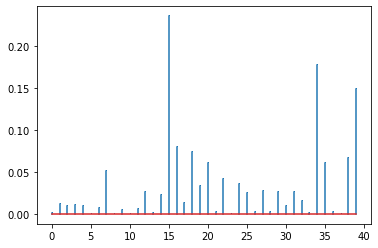

In [43]:
plt.stem(np.arange(len(train_X)) , np.round(c,3) , markerfmt = ",")

In [45]:
from statsmodels.graphics.regressionplots import influence_plot
fig,ax = plt.subplots(figsize = (8,6))
influence_plot( mba_salary_lm , ax = ax)
plt.title("Figure - Leverage Value Vs Residuals")
plt.show()

In [48]:
pred_y = mba_salary_lm.predict(test_x)
pred_y

6     279828.402452
36    272707.227686
37    215737.829560
28    237101.353858
43    295851.045675
49    247070.998530
5     226419.591709
33    308313.101515
20    254904.290772
42    295494.986937
dtype: float64

In [49]:
from sklearn.metrics import r2_score, mean_squared_error

In [50]:
np.abs(r2_score(test_y, pred_y))

0.15664584974230378